In [53]:
# importing the libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt

In [54]:
# Define a feedforward neural network (FNN) model
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)

        # Non-linearity
        self.sigmoid = nn.Sigmoid()

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)

        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)

        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

In [55]:
# Fetching the train and test dataset

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

In [56]:
# defining parameters like batch_size, number of iterations, number of epochs and loading the train and test set

batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [57]:
# Initialize the model, loss function, and optimizer
input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = FNN(input_dim, hidden_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [58]:
# Training the model


train_loss_ls = []
test_loss_ls = []
iter_ls = []

iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # test_loss
                test_loss = criterion(outputs, labels)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total


            # Print Loss
            print('Iteration: {}. train_loss: {}. test_loss: {}. Accuracy: {}'.format(iter, loss.item(), test_loss.item(), accuracy))
            train_loss_ls.append(loss.item())
            test_loss_ls.append(test_loss.item())
            iter_ls.append(iter)

Iteration: 500. train_loss: 2.1474454402923584. test_loss: 2.1430933475494385. Accuracy: 57.72999954223633
Iteration: 1000. train_loss: 1.8527374267578125. test_loss: 1.8933171033859253. Accuracy: 65.54000091552734
Iteration: 1500. train_loss: 1.5069372653961182. test_loss: 1.5520329475402832. Accuracy: 72.55000305175781
Iteration: 2000. train_loss: 1.2477352619171143. test_loss: 1.2625802755355835. Accuracy: 77.45999908447266
Iteration: 2500. train_loss: 0.9700966477394104. test_loss: 1.0711153745651245. Accuracy: 80.26000213623047
Iteration: 3000. train_loss: 0.8206827640533447. test_loss: 0.9426261782646179. Accuracy: 82.36000061035156
Iteration: 3500. train_loss: 0.6951854825019836. test_loss: 0.8605520725250244. Accuracy: 83.97000122070312
Iteration: 4000. train_loss: 0.793098509311676. test_loss: 0.7989147305488586. Accuracy: 84.94999694824219
Iteration: 4500. train_loss: 0.6330735683441162. test_loss: 0.7573345303535461. Accuracy: 85.86000061035156


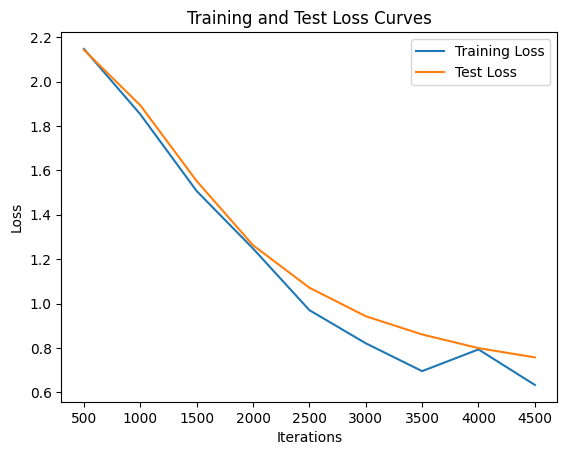

In [59]:
#Ploting the training and test loss curves
plt.plot(iter_ls, train_loss_ls, label='Training Loss')
plt.plot(iter_ls, test_loss_ls, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()